<a href="https://colab.research.google.com/github/obabar/Omkar_RTR_2018/blob/AI_ML_DS/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Loading Library
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/equester/TataTelecomAI/master/Sample%20Data/asr_data_tt.csv")

In [34]:
data.columns

Index([u'Incoming Attempts', u'Normal Term Seizures', u'Answered Calls',
       u'Normal Not Answer Calls', u'Outgoing Seizures', u'FEV Seizures',
       u'Network Conversation Minutes', u'NER', u'ACD'],
      dtype='object')

In [35]:
data.head(10)

,Incoming Attempts,Normal Term Seizures,Answered Calls,Normal Not Answer Calls,Outgoing Seizures,FEV Seizures,Network Conversation Minutes,NER,ACD
0,171,51,19,32,52,1,30.833333,100.000000,1.622807
1,1,44,31,13,44,0,0.033333,100.000000,0.001075
2,456601,440591,97563,343028,453573,3648,584245.166700,97.925432,5.988389
3,41,41,40,1,41,0,14.533333,100.000000,0.363333
4,239,49,11,38,71,14,36.666667,85.964912,3.333333
5,8019,459,188,271,643,103,1435.066667,85.000000,7.633333
6,10,8,8,0,8,0,13.133333,100.000000,1.641667
7,995717,810191,219605,590586,826539,14677,305785.550000,99.794177,1.392434
8,697441,495671,132245,363426,599515,18633,424442.050000,85.330756,3.209513
9,1826,8250,5360,2890,8373,65,102.300000,99.301878,0.019086


In [36]:
data.shape

(1678, 9)

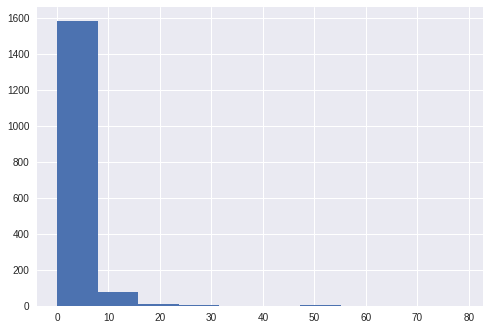

In [37]:
data['ACD'].hist()

TypeError: ignored

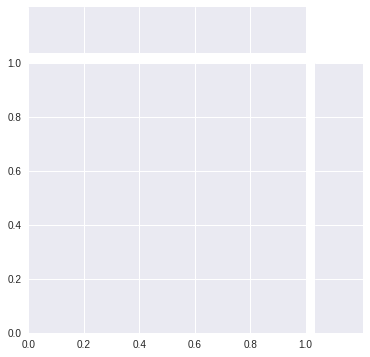

In [38]:
sns.jointplot("ASR", "Network Conversation Minutes", data=data, kind='reg')

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3,4,5,6,7,8
0,-0.097274,-0.104956,-0.110750,-0.096416,-0.089276,-0.104202,-0.094213,0.538661,-0.260589
1,-0.097284,-0.104957,-0.110748,-0.096419,-0.089276,-0.104203,-0.094214,0.538661,-0.626521
2,-0.069447,-0.063757,-0.089269,-0.043025,-0.061540,-0.100785,-0.061043,0.375909,0.724474
3,-0.097282,-0.104957,-0.110746,-0.096421,-0.089276,-0.104203,-0.094214,0.538661,-0.544780
4,-0.097270,-0.104956,-0.110752,-0.096415,-0.089274,-0.104190,-0.094212,-0.562401,0.125380


In [0]:
data.columns = ['Incoming Attempts',	'Normal Term Seizures'	,'Answered Calls','Normal Not Answer Calls',	'Outgoing Seizures',	'FEV Seizures',	'Network Conversation Minutes',	'NER',	'ACD']

In [42]:
data.head()

,Incoming Attempts,Normal Term Seizures,Answered Calls,Normal Not Answer Calls,Outgoing Seizures,FEV Seizures,Network Conversation Minutes,NER,ACD
0,-0.097274,-0.104956,-0.110750,-0.096416,-0.089276,-0.104202,-0.094213,0.538661,-0.260589
1,-0.097284,-0.104957,-0.110748,-0.096419,-0.089276,-0.104203,-0.094214,0.538661,-0.626521
2,-0.069447,-0.063757,-0.089269,-0.043025,-0.061540,-0.100785,-0.061043,0.375909,0.724474
3,-0.097282,-0.104957,-0.110746,-0.096421,-0.089276,-0.104203,-0.094214,0.538661,-0.544780
4,-0.097270,-0.104956,-0.110752,-0.096415,-0.089274,-0.104190,-0.094212,-0.562401,0.125380


In [0]:
feature_cols = ['Incoming Attempts',	'Normal Term Seizures',	'Answered Calls',	'Normal Not Answer Calls',	'Outgoing Seizures',	'FEV Seizures',	'Network Conversation Minutes',	'NER']
X = data[feature_cols]

In [46]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1678, 8)


In [47]:
y = data.ACD
y.head()

0   -0.260589
1   -0.626521
2    0.724474
3   -0.544780
4    0.125380
Name: ACD, dtype: float64

In [48]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1678,)


In [0]:
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)


In [50]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
('X_train shape: ', (1342, 8))
('y_train shape: ', (1342,))

Test cases as below
('X_test shape: ', (336, 8))
('y_test shape: ', (336,))


In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
from sklearn import linear_model

#model 1

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_test = linreg.predict(X_test)
#y_pred_test2 = linreg.predict(y_test)

#Accuracy
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))


In [69]:
RMSE_test

1.2896313602761296

In [70]:
print('Intercept:', linreg.intercept_)
print('Coefficients:',linreg.coef_)

('Intercept:', -0.019023095764239016)
('Coefficients:', array([-0.48131441, -0.05985643, -0.03385168, -0.07570249,  0.44777344,
        0.02691   ,  0.28936098, -0.10555596]))


In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [73]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
  print(c1,c2)
  

('Intercept', -0.019023095764239016)
('Incoming Attempts', -0.481314414547744)
('Normal Term Seizures', -0.059856428530235595)
('Answered Calls', -0.03385167795936983)
('Normal Not Answer Calls', -0.0757024921098109)
('Outgoing Seizures', 0.4477734448793444)
('FEV Seizures', 0.02691000372191695)
('Network Conversation Minutes', 0.2893609827913359)
('NER', -0.10555595662789213)


In [74]:
y_pred_test = linreg.predict(X_test)
y_test

df = pd.DataFrame(y_pred_test, y_test)
df.columns = ['Actual']
df.head()

,Actual
ACD,
0.040910,-0.081785
0.179910,-0.081769
-0.063910,0.167546
0.036189,0.028516
0.005864,-0.055799


In [76]:
linreg.predict(X[:1])

array([-0.08177313])